# <center> 2- Gestion des données manquantes </center>

**Sources :**

- HARRISON Matt, Machine learning, les fondamentaux : exploiter des données structurées en Python, First, Paris, 2020, p.33-38.
- https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009
- https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python
    
    
### Objectif :
Gérer les données manquantes.

---

## Importations

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
# pip install missingno
import missingno as msno
from sklearn.impute import SimpleImputer

## Chargement des données

In [2]:
# source dataset : https://github.com/mattharrison/datasets/blob/master/data/titanic3.xls

df = pd.read_excel("titanic3.xls")
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


## Gestion des données manquantes

In [3]:
# pourcentage de données manquantes en fonction des colonnes
df.isnull().mean()*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

### Visualisation (avec missingno)

<AxesSubplot:>

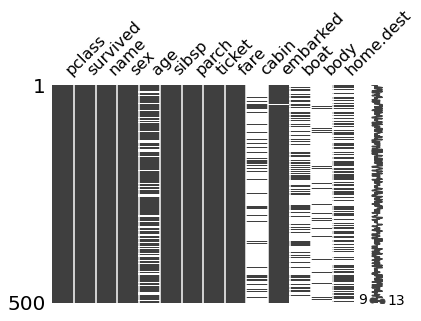

In [20]:
msno.matrix(df.sample(500), figsize=(6, 4))

### Histogramme (avec pandas)

<AxesSubplot:>

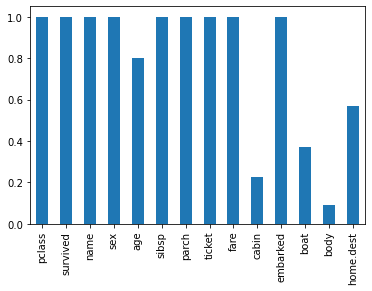

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=ax)

### Histogramme (avec missingno)

<AxesSubplot:>

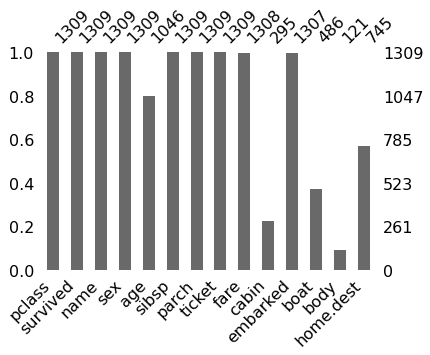

In [19]:
msno.bar(df, figsize=(6, 4))

### Heatmap (carte d'intensité de féquentation) avec missingno

<AxesSubplot:>

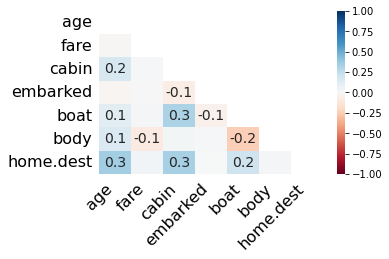

In [16]:
msno.heatmap(df, figsize=(5, 3))

### Dendrogramme (avec missingno)

<AxesSubplot:>

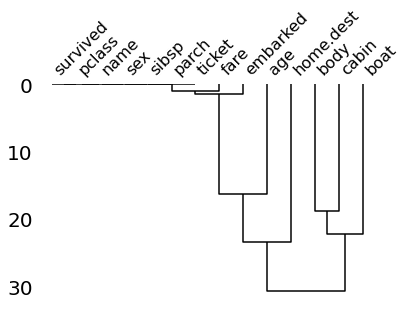

In [21]:
msno.dendrogram(df, figsize=(6, 4))

## Suppression des données manquantes (`dropna()`)

In [ ]:
# il faut repérer les colonnes avec des données manquantes, puis :
df1 = df.dropna(axis=1)

In [ ]:
# possible de remplacer les données manquantes par la moyenne/médiane avec `fillna()`

## Imputation de données

Il est possible de prédire les données manquantes. L'opération consistant à ajouter des valeurs en remplacements des manquants se nomment l'imputation.

Il est nécessaire de cosntruire une séquence de type pipeline pour utiliser la même logique d'imputation pendant la création du modèle et pendant le traitement de prédiction.

La classe nommée *SimpleImputer* de **sklearn** sait gérer les valeurs moyennes, médianes et les caractéristiques les plus fréquentes.

Par défaut, **c'est la moyenne qui est produite** :


In [23]:
num_cols = df.select_dtypes(include="number").columns
imputer = SimpleImputer()
imputed = imputer.fit_transform(df[num_cols])

---